# Income evaluation
- 성별, 나이, 직업군, 교육 수준 등에 따라 연간 수익이 50k 이상인지 이하인지 판별

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv("income_evaluation.csv")
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
 workclass         32561 non-null object
 fnlwgt            32561 non-null int64
 education         32561 non-null object
 education-num     32561 non-null int64
 marital-status    32561 non-null object
 occupation        32561 non-null object
 relationship      32561 non-null object
 race              32561 non-null object
 sex               32561 non-null object
 capital-gain      32561 non-null int64
 capital-loss      32561 non-null int64
 hours-per-week    32561 non-null int64
 native-country    32561 non-null object
 income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data[' sex'].unique()

array([' Male', ' Female'], dtype=object)

In [5]:
# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop([' education',' workclass',' marital-status',' occupation',' relationship', ' native-country', ' race', ' capital-loss'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행 - sex, income 칼럼
def format_features(df):
    df[' sex'] = df[' sex'].replace([' Male',' Female'],[1,0])
    df[' income'] = df[' income'].replace([' <=50K',' >50K'],[1,0])
    return df
    
# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = drop_features(df)
    df = format_features(df)
    return df

In [6]:
transform_features(data)

,age,fnlwgt,education-num,sex,capital-gain,hours-per-week,income
0,39,77516,13,1,2174,40,1
1,50,83311,13,1,0,13,1
2,38,215646,9,1,0,40,1
3,53,234721,7,1,0,40,1
4,28,338409,13,0,0,40,1
...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,1
32557,40,154374,9,1,0,40,0
32558,58,151910,9,0,0,40,1
32559,22,201490,9,1,0,20,1


In [7]:
# 원본 데이터 재로딩 후 Lable만 뽑아내기
income_data = pd.read_csv("income_evaluation.csv")
y_income = transform_features(income_data)
y_income = y_income[' income']

In [8]:
# 원본 데이터를 재로딩 하고, feature 데이터 셋 추출. 
income_data = pd.read_csv("income_evaluation.csv")
X_income = transform_features(income_data)
X_income= X_income.drop(' income',axis=1)

In [9]:
income_data = pd.read_csv("income_evaluation.csv")
feature_data = transform_features(income_data)
feature_data

,age,fnlwgt,education-num,sex,capital-gain,hours-per-week,income
0,39,77516,13,1,2174,40,1
1,50,83311,13,1,0,13,1
2,38,215646,9,1,0,40,1
3,53,234721,7,1,0,40,1
4,28,338409,13,0,0,40,1
...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,1
32557,40,154374,9,1,0,40,0
32558,58,151910,9,0,0,40,1
32559,22,201490,9,1,0,20,1


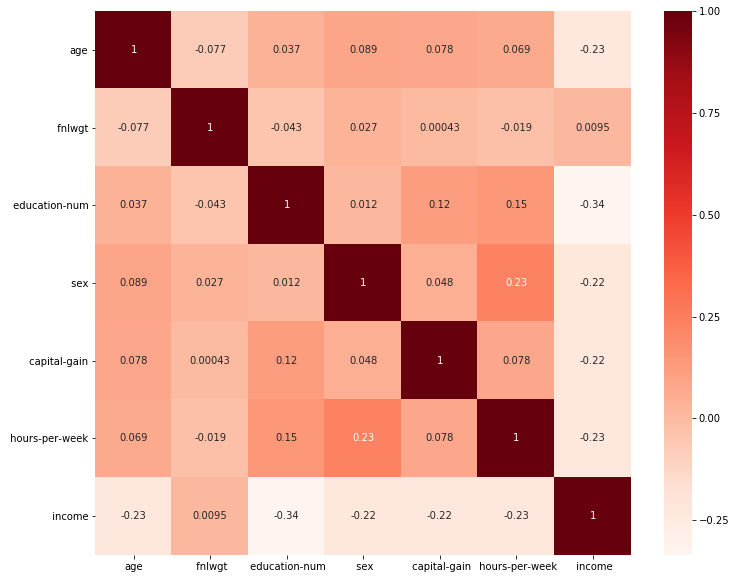

In [10]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = feature_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
X_income

,age,fnlwgt,education-num,sex,capital-gain,hours-per-week
0,39,77516,13,1,2174,40
1,50,83311,13,1,0,13
2,38,215646,9,1,0,40
3,53,234721,7,1,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,1,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,1,0,20


In [12]:
# test 셋과 training set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_income, y_income, test_size=0.4, random_state=80)

In [13]:
y_test

22946    1
13044    1
828      1
9320     1
14156    1
        ..
9447     1
29295    1
8055     0
26704    0
13878    1
Name:  income, Length: 13025, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier()

dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
print(pred)
print("예측 정확도:{0:.4f}".format(accuracy_score(y_test,pred)))

[1 1 1 ... 1 1 1]
예측 정확도:0.7631


In [15]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_income)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_income.values[train_index], X_income.values[test_index]
        y_train, y_test = y_income.values[train_index], y_income.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5)

교차 검증 0 정확도: 0.7648
교차 검증 1 정확도: 0.7626
교차 검증 2 정확도: 0.7604
교차 검증 3 정확도: 0.7741
교차 검증 4 정확도: 0.7718
평균 정확도: 0.7667
